In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import gc
import timeit
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from scipy import sparse
import seaborn as sn
from joblib import dump, load
import multiprocessing as mp
from pandarallel import pandarallel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import time
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.ensemble import GradientBoostingClassifier


## Import Labels


In [5]:
labels = []
def importLabels():
#     with open('./Data/shortlabels.txt', 'r') as filehandle:
    with open('./Data/labels.txt', 'r') as filehandle:


        for line in filehandle:
            # remove linebreak, if exists, which is the last character of the string
            if(line[-1] == "\n"):
                currentPlace = line[:-1]
            else:
                currentPlace = line[:]
            # add item to the list
            labels.append(currentPlace)
importLabels()

In [5]:
print(len(labels))

30000


# Import Kmer counts DFs data  from disc

In [37]:
k=7
#Data generated with old code
# Xt = pd.read_pickle(r"D:\DataSet\Data\Generated kmers with old py code\4-5-Kmers-60,000 samples")

# data generated with Linux kmer counter code, 4-5-6-kmers
# Xt = pd.read_pickle(r"D:\DataSet\Data\Generated kmers with old py code\4-5-Kmers-60,000 samples")

# X = pd.read_feather(r"D:\DataSet\df-k"+str(k)+".feather")
# X=pd.DataFrame()
# Xt5=pd.DataFrame()
X = pd.read_feather(r"D:\DataSet\MULTI\bow\10k-df-k6part-0.feather")
# p2 = pd.read_feather(r"D:\DataSet\MULTI\bow\10k-df-k7part-1.feather")
# p3 = pd.read_feather(r"D:\DataSet\MULTI\bow\10k-df-k7part-2.feather")

for i in range(1,6):
    p = pd.read_feather(r"D:\DataSet\MULTI\bow\10k-df-k6part-"+str(i) +r".feather")
#     p5 = pd.read_feather(r"D:\DataSet\MULTI\bow\10k-df-k5part-"+str(i) +r".feather")

    X = pd.concat([X, p], ignore_index=True)
#     Xt5 = pd.concat([Xt5, p5], ignore_index=True)
    
# X = pd.concat([Xt6, Xt5], axis=1)#, ignore_index=True)
# X= pd.concat([Xt, p3], ignore_index=True)
# X= pd.concat([p1,p2, p3], ignore_index=True)


# X.loc[,:]

display(X)

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTCG,TTTTCT,TTTTGA,TTTTGC,TTTTGG,TTTTGT,TTTTTA,TTTTTC,TTTTTG,TTTTTT
0,6.0,6.0,3.0,3.0,2.0,5.0,3.0,6.0,4.0,3.0,...,NaN,3.0,3.0,3.0,3.0,3.0,NaN,4.0,5.0,4.0
1,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,...,2.0,4.0,NaN,NaN,2.0,2.0,3.0,2.0,NaN,3.0
2,NaN,NaN,4.0,2.0,2.0,NaN,2.0,NaN,NaN,6.0,...,5.0,NaN,2.0,3.0,4.0,NaN,3.0,5.0,NaN,4.0
3,3.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,3.0,...,2.0,NaN,NaN,NaN,2.0,3.0,NaN,2.0,NaN,NaN
4,2.0,2.0,2.0,3.0,3.0,2.0,2.0,NaN,3.0,2.0,...,NaN,2.0,3.0,NaN,2.0,3.0,2.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3.0,2.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,NaN,NaN,2.0,5.0,NaN,2.0,3.0
59996,NaN,NaN,2.0,4.0,NaN,2.0,2.0,2.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,3.0,4.0,5.0,NaN,NaN
59997,NaN,NaN,4.0,2.0,4.0,2.0,2.0,3.0,4.0,2.0,...,NaN,3.0,NaN,2.0,NaN,3.0,2.0,2.0,2.0,3.0
59998,3.0,NaN,NaN,NaN,4.0,NaN,2.0,2.0,2.0,NaN,...,2.0,5.0,5.0,2.0,2.0,NaN,NaN,4.0,2.0,NaN


In [38]:
X.fillna(0, inplace=True)
X = X.astype(int)
display(X)

# labels = []
# importLabels()

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTCG,TTTTCT,TTTTGA,TTTTGC,TTTTGG,TTTTGT,TTTTTA,TTTTTC,TTTTTG,TTTTTT
0,6,6,3,3,2,5,3,6,4,3,...,0,3,3,3,3,3,0,4,5,4
1,2,0,2,0,2,0,0,0,3,0,...,2,4,0,0,2,2,3,2,0,3
2,0,0,4,2,2,0,2,0,0,6,...,5,0,2,3,4,0,3,5,0,4
3,3,0,2,2,2,0,0,0,2,3,...,2,0,0,0,2,3,0,2,0,0
4,2,2,2,3,3,2,2,0,3,2,...,0,2,3,0,2,3,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,2,0,3,0,5,0,0,0,0,...,3,3,3,0,0,2,5,0,2,3
59996,0,0,2,4,0,2,2,2,0,0,...,2,0,0,0,0,3,4,5,0,0
59997,0,0,4,2,4,2,2,3,4,2,...,0,3,0,2,0,3,2,2,2,3
59998,3,0,0,0,4,0,2,2,2,0,...,2,5,5,2,2,0,0,4,2,0


# Transform data from BagOfWords to Tf-Idf

# Feature Selection Select best features

In [24]:
CachedDF = X

In [25]:
# X = CachedDF
# X =  X.astype(int)
# X

,AAAAAA,AAAAAC,AAAAAG,AAAAAT,AAAACA,AAAACC,AAAACG,AAAACT,AAAAGA,AAAAGC,...,TTTTCG,TTTTCT,TTTTGA,TTTTGC,TTTTGG,TTTTGT,TTTTTA,TTTTTC,TTTTTG,TTTTTT
0,6,6,3,3,2,5,3,6,4,3,...,0,3,3,3,3,3,0,4,5,4
1,2,0,2,0,2,0,0,0,3,0,...,2,4,0,0,2,2,3,2,0,3
2,0,0,4,2,2,0,2,0,0,6,...,5,0,2,3,4,0,3,5,0,4
3,3,0,2,2,2,0,0,0,2,3,...,2,0,0,0,2,3,0,2,0,0
4,2,2,2,3,3,2,2,0,3,2,...,0,2,3,0,2,3,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,2,0,3,0,5,0,0,0,0,...,3,3,3,0,0,2,5,0,2,3
59996,0,0,2,4,0,2,2,2,0,0,...,2,0,0,0,0,3,4,5,0,0
59997,0,0,4,2,4,2,2,3,4,2,...,0,3,0,2,0,3,2,2,2,3
59998,3,0,0,0,4,0,2,2,2,0,...,2,5,5,2,2,0,0,4,2,0


In [39]:
start = time.time()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=420) # If using tf-idf vector, just replace X_cv with X1.

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
# Calculate accuracy rate, recall rate, and f1
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(Y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(Y_test, y_predicted):
    accuracy = accuracy_score(Y_test, y_predicted)
    precision = precision_score(Y_test, y_predicted, average='weighted')
    recall = recall_score(Y_test, y_predicted, average='weighted')
    f1 = f1_score(Y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(Y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


end = time.time()
# total time taken
print(f"Runtime of kmer counting is {end - start} secs")


Confusion matrix

Predicted     0     1
Actual               
0          5669  3462
1          3178  5691
accuracy = 0.631 
precision = 0.631 
recall = 0.631 
f1 = 0.631


In [43]:
start = time.time()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
SVCpipe = Pipeline([('scale', MinMaxScaler()),
                   ('clf',MultinomialNB())])
param_grid = {'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}   
# defining parameter range
  
clf = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
end = time.time()
# total time taken
print(f"Runtime of GridSearch HyperParam tuning of "+ str(clf)+ f"classifier is {end - start} secs")


start = time.time()

clf.fit(X_train,y_train)

end = time.time()
# total time taken
print(f"Runtime of fitting "+ str(clf)+ f"classifier is {end - start} secs")


# print best parameter after tuning
print(clf.best_params_)

# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)



Runtime of GridSearch HyperParam tuning of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             return_train_score=True)classifier is 0.0009996891021728516 secs
Runtime of fitting GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             return_train_score=True)classifier is 120.86841297149658 secs
{'clf__alpha': 0.1}
Pipeline(steps=[('scale', MinMaxScaler()), ('clf', MultinomialNB(alpha=0.1))])


In [44]:
y_pred = clf.predict(X_test)
# print("Confusion matrix\n")
def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.632 
precision = 0.633 
recall = 0.632 
f1 = 0.632


# Scale Data and Train

In [27]:
# max_abs_scaler = MaxAbsScaler()
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    labels, 
                                                    test_size = 0.1, 
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(54000, 4096)
(6000, 4096)


## Select Model

In [ ]:
start = time.time()

# clf = make_pipeline(StandardScaler(),GaussianNB()) ## Bad performance on kmers 4-5
# clf=  make_pipeline(StandardScaler(),LogisticRegression(random_state=0, max_iter=40000).fit(X_train, y_train))

# clf=  make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5, C=0.01, max_iter=2500))# Hyper Tuned

# clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
# clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=10))
# clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0))
# clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

clf.fit(X_train, y_train)


end = time.time()
# total time taken
print(f"Runtime of fitting "+ str(clf)+ f"classifier is {end - start} secs")

y_pred = clf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

In [45]:

# print("Confusion matrix\n")
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

# pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))


accuracy = 0.654 
precision = 0.655 
recall = 0.654 
f1 = 0.654


array([[930, 525],
       [558, 987]], dtype=int64)

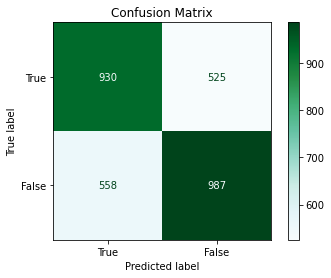

In [15]:
class_names = ['True', 'False']
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.BuGn)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix


In [ ]:
# clf?
start = time.time()
from sklearn.pipeline import Pipeline
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])
  
# defining parameter range

param_grid = {'SVC__C':np.arange(0.01,100,10)}
  
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
end = time.time()
# total time taken
print(f"Runtime of GridSearch HyperParam tuning of "+ str(clf)+ f"classifier is {end - start} secs")


start = time.time()

linearSVC.fit(X_train,y_train)

end = time.time()
# total time taken
print(f"Runtime of fitting "+ str(clf)+ f"classifier is {end - start} secs")


# print best parameter after tuning
print(clf.best_params_)

# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)



Runtime of GridSearch HyperParam tuning of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])classifier is 0.013000965118408203 secs


C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase

In [ ]:
y_pred = linearSVC.predict(X_test)
# print("Confusion matrix\n")
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

# pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))


In [ ]:
gc.collect()

Runtime of GridSearchCV LinearSVC (random_state=0, tol=1e-05) classifier is 10416.215190410614 secs
Best parameter after tuning: {'SVC__C': 0.01}

Warnings: C:\Users\Bassem new\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

# GridSearch SVC model

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      2015
           1       0.60      0.59      0.60      1985

    accuracy                           0.60      4000
   macro avg       0.60      0.60      0.60      4000
weighted avg       0.60      0.60      0.60      4000



In [ ]:

# y_pred = clf.predict(X_test)

accuracy = 0.601 
precision = 0.600 
recall = 0.601 
f1 = 0.600


array([[1226,  789],
       [ 809, 1176]], dtype=int64)

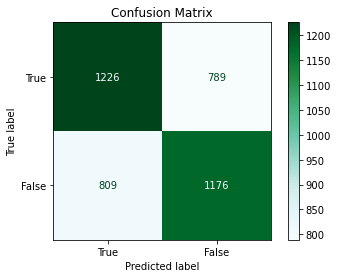

In [ ]:
# sn.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')), annot=True,cmap="OrRd")
# dump(clf, './saved/clf.joblib') 
# clf = load('./saved/clf.joblib') 

In [161]:
# ! pip install natsort
import natsort, os
def get_files(directory,pattern):
    '''
    Get the files of a directory, this returns the files in sorted order,
    Sort is very important as it assures DataFrame order
    corresponding to the original data order
    '''
    # pl = glob.glob(directory+r"\*.txt")
    files = natsort.natsorted(os.listdir(directory))
    # for p in files:
    #     display(r"\n" + p)
    for path in files:
        yield directory + r"\\" + path

In [163]:
pattern="*"
countsPath = r"D:\DataSet\MULTI\bow\6mer"
files = []
# Get files based on pattern and their sum of size
for file in get_files(directory=countsPath,pattern=pattern):
        files.append(file)

In [165]:
display(files[-1])

'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-59999.txt'

In [174]:
l1 = np.array(files).reshape(6,10000)

In [184]:
# display(l1[1][:].tolist())
display(l1[0])

array(['D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-0.txt',
       'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-1.txt',
       'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-2.txt', ...,
       'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-9997.txt',
       'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-9998.txt',
       'D:\\DataSet\\MULTI\\bow\\6mer\\\\kmers-6-seqNb-9999.txt'],
      dtype='<U50')